# Customer Segmentation Using K-Means Clustering

In [82]:
import random 
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [25]:
np.random.seed(0)

(5000, 2) (5000,)


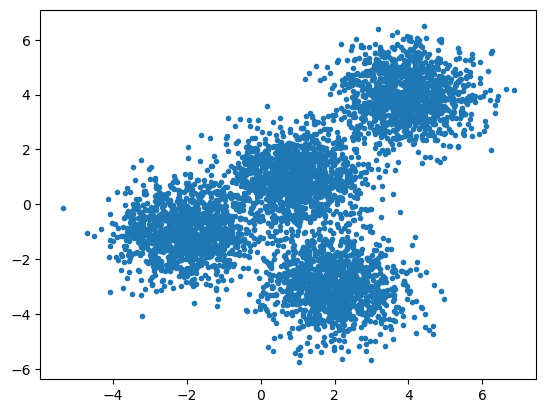

In [26]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)
print(X.shape, y.shape)
plt.scatter(X[:, 0], X[:, 1], marker='.')

In [30]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [36]:
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
len(set(k_means_labels))

4

In [62]:
my_members = (k_means_labels == 3)
my_members
X[my_members, 0], X[my_members, 1]

array([False,  True,  True, ..., False, False, False])

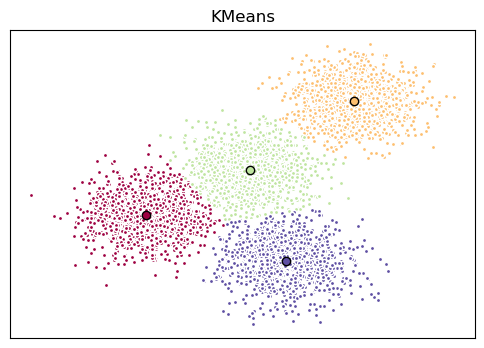

In [38]:
plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

plt.title('KMeans')
plt.xticks(())
plt.yticks(())
plt.show()

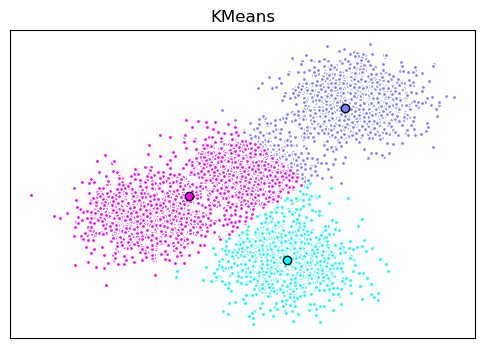

In [72]:
km = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
km.fit(X)

km_labels = km.labels_
km_cluster_centers = km.cluster_centers_
plt.figure(figsize=(6, 4))
colors = plt.cm.cool(np.linspace(0, 1, len(set(km_labels))))

for k, col in zip(range(3), colors):
    my_members = (km_labels == k)
    cluster_center = km_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

plt.title('KMeans')
plt.xticks(())
plt.yticks(())
plt.show()

In [98]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [100]:
X = cust_df.drop(['Address', 'Customer Id'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.3 KB


In [102]:
X = X.fillna(0)
X = StandardScaler().fit_transform(X)

In [130]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[0 2 1 0 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2 0 0 0 1 2 2 0 0 0 0 0 0 2 1 0 0 0 1
 1 0 2 1 2 0 2 0 2 0 0 0 0 2 2 1 0 1 1 1 0 0 0 2 0 2 2 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 2 0 0 1 2 0 2 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 2 0 1 1 2 0 0 0 0 0
 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 0 0 1
 0 0 0 2 1 0 0 0 0 2 1 1 0 2 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 0 1 2 1 0 0 2 1
 2 0 0 0 0 0 2 0 1 0 0 0 2 2 0 2 0 1 0 0 1 0 2 0 1 0 0 0 0 0 1 1 2 0 0 1 2
 0 0 0 0 2 0 0 1 0 0 0 0 2 0 0 1 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 1 0 1 0
 0 0 2 0 1 2 1 0 2 0 0 1 0 0 0 0 1 1 1 0 0 0 2 0 0 2 0 2 0 0 2 0 0 0 1 0 0
 1 0 1 2 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 2 0 1 0 0 0 1 1 0 0 0 2 1
 0 0 1 0 2 0 0 0 0 0 1 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1 0 1 0 0 0 2 2 0
 1 0 2 1 1 0 0 0 1 0 0 0 0 0 2 0 2 0 0 0 0 1 0 1 0 0 0 2 0 0 0 0 1 0 0 1 1
 2 0 0 0 0 0 1 1 0 2 1 2 0 0 1 0 0 2 2 0 1 0 0 2 0 1 0 2 0 0 0 2 0 0 0 0 2
 0 1 0 0 0 0 2 1 0 0 2 0 1 0 0 2 0 2 0 0 0 0 0 0 0 2 2 0 0 2 0 1 0 0 0 1 0
 1 0 0 0 0 0 2 1 1 0 2 0 

In [115]:
cust_df["Clus_km"] = labels
cust_df.drop('Address', axis=1).head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [119]:
k_means.cluster_centers_

array([[-3.90439547e-01,  1.62695612e-01, -6.79376729e-01,
        -3.86448408e-01, -6.83901553e-05, -6.93056978e-02,
         1.87982575e+00,  5.69270845e-01],
       [-1.50796609e-01, -1.15651304e-01, -1.38795179e-01,
        -2.73411279e-01, -3.40626044e-01, -3.71502176e-01,
        -5.23796543e-01, -3.28592133e-01],
       [ 9.91773769e-01,  2.38756999e-01,  1.27421461e+00,
         1.43518566e+00,  1.24440502e+00,  1.43538377e+00,
        -2.09335587e-01,  5.57517111e-01]])

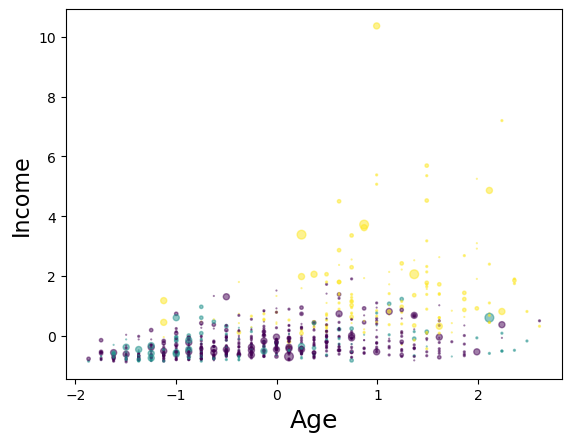

In [153]:
area = np.pi * ( X[:, 1])**2  # education
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

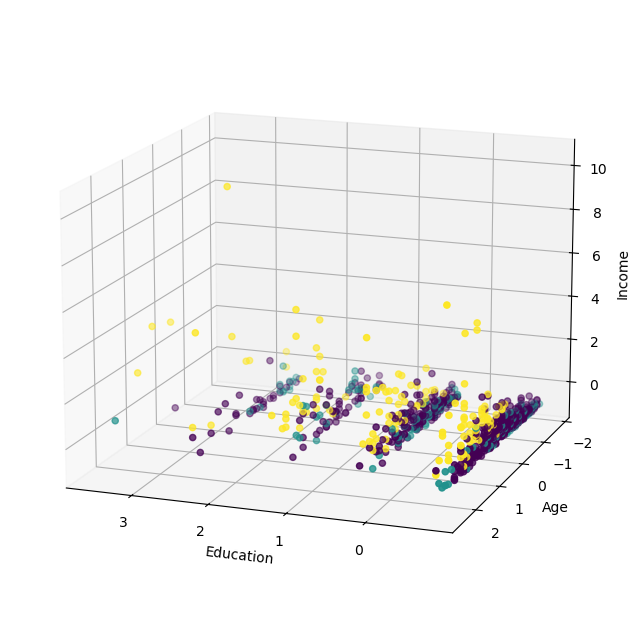

In [195]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', elev=15, azim=110)


# plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_zlabel('Income')
ax.set_ylabel('Age')


ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))
